In [142]:
#Importing Pandas,Numpy,Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing Dataset
df=pd.read_csv('iris.csv')

In [3]:
#head part
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#tail part
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#data types
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
#describe function
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#column names
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
#checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:ylabel='Density'>

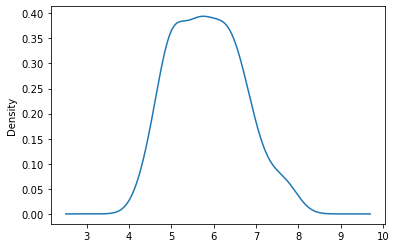

In [136]:
df['SepalLengthCm'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

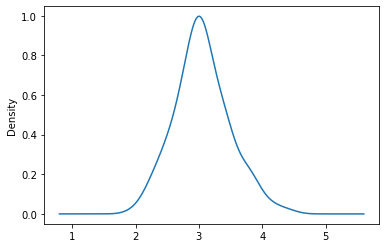

In [137]:
df['SepalWidthCm'].plot(kind='density')

<AxesSubplot:>

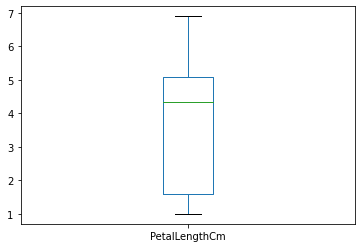

In [138]:
df['PetalLengthCm'].plot(kind='box')

<AxesSubplot:>

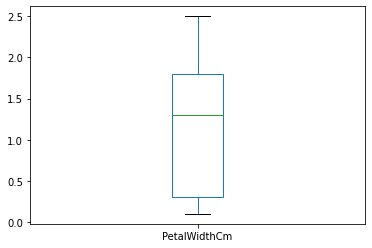

In [140]:
df['PetalWidthCm'].plot(kind='box')

In [9]:
#Importing labelencoder
from sklearn.preprocessing import LabelEncoder 

In [10]:
#short name
le=LabelEncoder()

In [11]:
#applying label encoder for species column
df['Species']=le.fit_transform(df['Species'])

In [12]:
#head
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
#Data types
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [14]:
#counts of species
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [15]:
#dropping id variable
df=df.drop('Id',axis=1)

<AxesSubplot:ylabel='Density'>

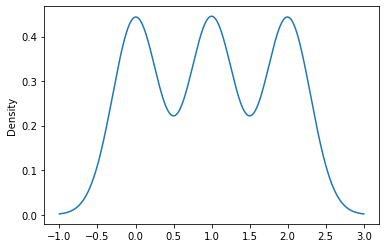

In [132]:
df['Species'].plot(kind='density')

<AxesSubplot:ylabel='Frequency'>

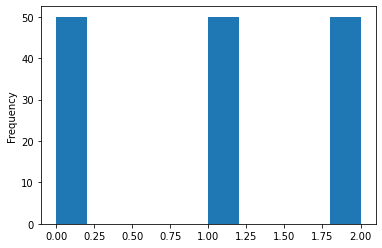

In [134]:
df['Species'].plot(kind='hist')

<AxesSubplot:ylabel='Species'>

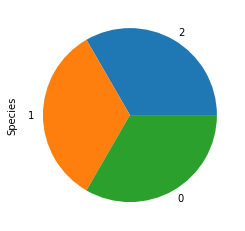

In [141]:
df['Species'].value_counts().plot(kind='pie')

<AxesSubplot:>

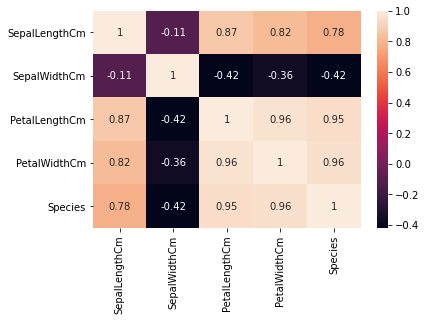

In [143]:
sns.heatmap(df.corr(),annot=True)

In [16]:
#checking null hypothesis for Species and SepalLengthCm
df.groupby(['Species'])['SepalLengthCm'].mean()

Species
0    5.006
1    5.936
2    6.588
Name: SepalLengthCm, dtype: float64

In [17]:
#dividing on basis of species
z=df[df['Species']==0]
o=df[df['Species']==1]
t=df[df['Species']==2]

In [18]:
#Importing annova test
from scipy.stats import f_oneway

In [19]:
f_oneway(z['SepalLengthCm'],o['SepalLengthCm'],t['SepalLengthCm'])
#p-value is less than 0.05,so reject null hypothesis
#there is relation between the Species and SepalLengthCm

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [20]:
#checking null hypothesis for Species and SepalWidthCm
f_oneway(z['SepalWidthCm'],o['SepalWidthCm'],t['SepalWidthCm'])
#p-value is less than 0.05,so reject null hypothesis
#there is relation between the Species and SepalWidthCm

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

In [21]:
#checking null hypothesis for Species and PetalLengthCm
f_oneway(z['PetalLengthCm'],o['PetalLengthCm'],t['PetalLengthCm'])
#p-value is less than 0.05,so reject null hypothesis
#there is relation between the Species and PetalLengthCm

F_onewayResult(statistic=1179.0343277002194, pvalue=3.0519758018278374e-91)

In [22]:
#checking null hypothesis for Species and PetalWidthCm
f_oneway(z['PetalWidthCm'],o['PetalWidthCm'],t['PetalWidthCm'])
#p-value is less than 0.05,so reject null hypothesis
#there is relation between the Species and PetalWidthCm

F_onewayResult(statistic=959.3244057257613, pvalue=4.376956957488959e-85)

In [23]:
#dividing independent and dependent variable
y=df['Species']
X=df.drop('Species',axis=1)

In [24]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

In [25]:
#short name
lr=LogisticRegression(max_iter=1000)

In [26]:
#model building
lrmodel=lr.fit(X,y)

In [27]:
#R-square
lrmodel.score(X,y)

0.9733333333333334

In [28]:
lrpredict=lrmodel.predict(X)

In [29]:
#cross tabulation of y and predicted variable
pd.crosstab(y,lrpredict)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,47,3
2,0,1,49


In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
np.mean(cross_val_score(lr,X,y,cv=5))

0.9733333333333334

In [96]:
from sklearn.metrics import classification_report

In [98]:
print(classification_report(y,lrpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [32]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [124]:
#short name
dt=DecisionTreeClassifier(max_depth=3)

In [125]:
#model building
dtmodel=dt.fit(X,y)

In [126]:
#R-square
dtmodel.score(X,y)

0.9733333333333334

In [127]:
dtpredict=dtmodel.predict(X)

In [128]:
#cross tabulation of y and predicted variable
pd.crosstab(y,dtpredict)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,47,3
2,0,1,49


In [129]:
np.mean(cross_val_score(dt,X,y,cv=5))

0.96

In [99]:
print(classification_report(y,dtpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [39]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
#short name
rf=RandomForestClassifier(n_estimators=1000)

In [41]:
#model building
rfmodel=rf.fit(X,y)

In [42]:
#R-square
rfmodel.score(X,y)

1.0

In [43]:
rfpredict=rfmodel.predict(X)

In [44]:
#cross tabulation of y and predicted variable
pd.crosstab(y,rfpredict)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,50,0
2,0,0,50


In [45]:
np.mean(cross_val_score(rf,X,y,cv=5))

0.9666666666666668

In [100]:
print(classification_report(y,rfpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [46]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
#short name
gb=GradientBoostingClassifier(n_estimators=1000)

In [48]:
#model building
gbmodel=gb.fit(X,y)

In [49]:
#R-square
gbmodel.score(X,y)

1.0

In [50]:
gbpredict=gb.predict(X)

In [51]:
#cross tabulation of y and predicted variable
pd.crosstab(y,gbpredict)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,50,0
2,0,0,50


In [52]:
np.mean(cross_val_score(gb,X,y,cv=5))

0.9600000000000002

In [101]:
print(classification_report(y,gbpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [53]:
#XGBoostClassifier
from xgboost import XGBClassifier

In [54]:
#short name
xgb=XGBClassifier(n_estimators=10000,learning_rate=0.95)

In [55]:
#model building
xgbmodel=xgb.fit(X,y)

C:\Users\kasin\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
#R-square
xgbmodel.score(X,y)

1.0

In [57]:
xgbpredict=xgbmodel.predict(X)

In [58]:
#cross tabulation of y and predicted variable
pd.crosstab(y,xgbpredict)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,50,0
2,0,0,50


In [59]:
np.mean(cross_val_score(xgb,X,y,cv=5))

C:\Users\kasin\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9400000000000001

In [102]:
print(classification_report(y,xgbpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [60]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB 

In [61]:
#short name
nb=GaussianNB()

In [62]:
#model building
nbmodel=nb.fit(X,y)

In [63]:
#R-square
nbmodel.score(X,y)

0.96

In [64]:
nbpredict=nbmodel.predict(X)

In [65]:
#cross tabulation of y and predicted variable
pd.crosstab(y,nbpredict)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,47,3
2,0,3,47


In [66]:
np.mean(cross_val_score(nb,X,y,cv=5))

0.9533333333333334

In [103]:
print(classification_report(y,nbpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [67]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [68]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
ss=StandardScaler()

In [71]:
X_ss=ss.fit_transform(X)

In [72]:
#parameters
param={'n_neighbors':range(1,50),'weights':['uniform','distance']}

In [73]:
#short name
grid=GridSearchCV(KNeighborsClassifier(),param)

In [74]:
#model building
gridmodel=grid.fit(X,y)

In [75]:
#best parameters
gridmodel.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [76]:
#short name
kn=KNeighborsClassifier(n_neighbors=10,weights='distance')

In [77]:
#model building
knmodel=kn.fit(X_ss,y)

In [78]:
#R-square
knmodel.score(X_ss,y)

1.0

In [79]:
knpredict=knmodel.predict(X_ss)

In [80]:
#cross tabulation of y and predicted variable
pd.crosstab(y,knpredict)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,50,0
2,0,0,50


In [81]:
np.mean(cross_val_score(kn,X_ss,y,cv=5))

0.9666666666666666

In [104]:
print(classification_report(y,knpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [82]:
#support vector machine
from sklearn.svm import SVC

In [92]:
#short name
svc=SVC()

In [93]:
#model building
svcmodel=svc.fit(X,y)

In [130]:
#R-square
svcmodel.score(X,y)

0.9733333333333334

In [85]:
svcpredict=svcmodel.predict(X)

In [94]:
#cross tabulation of y and predicted variable
pd.crosstab(y,svcpredict)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,48,2
2,0,2,48


In [87]:
np.mean(cross_val_score(svc,X,y,cv=5))

0.9666666666666666

In [105]:
print(classification_report(y,svcpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [131]:
#among all the models the Logistic Regreesion average accuracy is more.
#so we choose the LogisticRegression model for predicting the species.